## 5. 모델 성능 높이기

In [1]:
#유방암 데이터셋
from sklearn.datasets import load_breast_cancer 
cancer = load_breast_cancer() 

In [2]:
#train-test-split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(cancer.data, 
                                                    cancer.target, 
                                                    stratify = cancer.target, 
                                                    random_state = 66) 

### kNN 분류
kNN은 주변 데이터 k개를 살펴보아 더 많은 데이터가 포함되어있는 범주로 분류하는 방식으로 몇 개의 데이터를 살펴볼지 정할 수 있음 

=k를 조정하며 최적의 성능을 보이는 모델을 구축하기

지난 시간에 진행했던 모델은 아무런 파라미터 조정을 하지 않은 것이며 디폴트값은 k=5

In [3]:
from sklearn.neighbors import KNeighborsClassifier

#k=5로 진행
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [4]:
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

#train 데이터 성능은 약 0.948
#test 데이터 성능은 약 0.923

0.9483568075117371
0.9230769230769231


#### k값 조정 - n_neighbors

In [5]:
#n_neighbors가 3일 때
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train,y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9577464788732394
0.9230769230769231


n_neighbors가 3일 때 train 정확도가 0.957로 조금 더 나은 성능을 보이고, test 정확도는 5일 때와 같다. 

In [7]:
#n_neighbors가 7일 때
knn=KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train,y_train)
print(knn.score(X_train, y_train))
print(knn.score(X_test, y_test))

0.9436619718309859
0.9300699300699301


n_neighbors가 7일 때 train 정확도는 조금 낮아졌지만, test 정확도는 더 높아졌다. 즉 좀 더 나은 일반화 성능을 보인다.

#### for 반복문을 이용해 가장 좋은 파라미터 한번에 확인하기

In [8]:
#k값을 변경하며 각각의 성능을 담을 리스트 생성
training_accuracy = [] 
test_accuracy = [] 

In [9]:
#k값은 1부터 10까지
neighbors_settings = range(1, 11)

#neighbors_settings를 for문에 적용하여 n_neighbors에 대입
for n_neighbors in neighbors_settings:
    knn= KNeighborsClassifier(n_neighbors = n_neighbors) 
    knn.fit( X_train, y_train) 
    # 리스트에 추가
    training_accuracy.append(knn.score( X_train, y_train)) 
    test_accuracy.append(knn.score( X_test, y_test)) 

In [10]:
training_accuracy

[1.0,
 0.9765258215962441,
 0.9577464788732394,
 0.9553990610328639,
 0.9483568075117371,
 0.9460093896713615,
 0.9436619718309859,
 0.9413145539906104,
 0.9342723004694836,
 0.9389671361502347]

In [11]:
test_accuracy

[0.9020979020979021,
 0.8881118881118881,
 0.9230769230769231,
 0.9230769230769231,
 0.9230769230769231,
 0.9370629370629371,
 0.9300699300699301,
 0.9300699300699301,
 0.916083916083916,
 0.916083916083916]

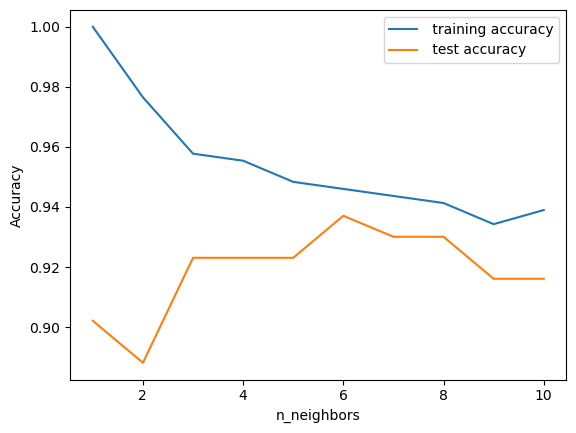

In [12]:
#시각화로 한눈에 파악
import matplotlib.pyplot as plt

plt.plot(neighbors_settings, training_accuracy, label =" training accuracy") 
plt.plot(neighbors_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("n_neighbors") 
plt.legend()

기본적으로 test 정확도가 가장 높은 순간이 가장 좋은 모델이라고 판단함
위의 경우 n_neighbors가 6일 때 가장 좋은 모델이라고 할 수 있음

### Decision Tree
특정 기준(질문)에 따라 데이터를 구분하여 트리 모양의 모델을 구축함. 

트리의 깊이(질문수)가 깊을 수록 train 데이터셋에 과하게 적합되어 일반화 성능이 떨어지고, 트리의 깊이(질문수)가 얕으면 train 데이터셋 조차 잘 설명하지 못하는 과소적합이 일어난다. 

트리의 최대 깊이(질문수) 조정을 통해 과대적합, 과소적합을 줄이고 일반화 성능을 높일 수 있다. 

In [13]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [14]:
print(tree.score(X_train, y_train))
print(tree.score(X_test, y_test))

#train 데이터 성능은 1.0
#test 데이터 성능은 약 0.895

1.0
0.8951048951048951


#### 트리의 깊이 조절- max_depth

In [17]:
tree.max_depth

트리의 최대 깊이 max_depth의 디폴트값은 없다. 완벽하게 클래스 값이 결정될 때까지 분할한다.

In [22]:
#k값을 변경하며 각각의 성능을 담을 리스트 생성
training_accuracy = [] 
test_accuracy = [] 

In [23]:
#k값은 1부터 10까지
max_depth_settings = range(1, 11)

#max_depth_settings를 for문에 적용하여 max_depth에 대입
for max_depth in max_depth_settings:
    tree = DecisionTreeClassifier(random_state=0, max_depth=max_depth)
    tree.fit( X_train, y_train) 
    # 리스트에 추가
    training_accuracy.append(tree.score( X_train, y_train)) 
    test_accuracy.append(tree.score( X_test, y_test)) 

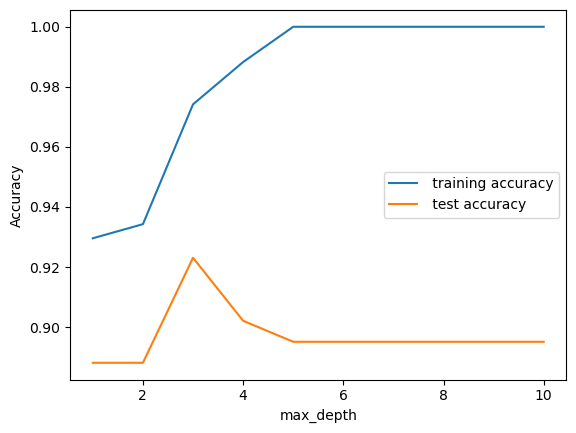

In [25]:
#시각화로 한눈에 파악
plt.plot(max_depth_settings, training_accuracy, label =" training accuracy") 
plt.plot(max_depth_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("max_depth") 
plt.legend()

최대 트리 깊이 5이상은 모두 같음=더이상 나눌 수 없음

5 이하의 경우 더 나눌 수 있지만 과적합을 막기 위해 조절한 것임. 

test 정확도가 가장 높아 일반화 성능이 가장 높은 경우는 max_depth가 3인 경우이고 가장 좋은 모델이다.

https://injo.tistory.com/15
결정트리 관련 파라미터 조정

### Random Forest
랜덤포레스트는 랜덤으로 추출된 데이터셋에 대한 결정트리의 집합으로 대표적인 파라미터는n_estimators, max_features이다. 

n_estimators는 몇 개의 트리를 만들지 조정하는 것이고, max_features는 각 결정트리 생성 시 몇 개의 열을 선택할지 조정하는 것이다.

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state=0)
forest.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [27]:
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

#train 데이터 성능은 1.0
#test 데이터 성능은 약 0.958

1.0
0.958041958041958


#### 트리 개수 조절- n_estimators

In [28]:
forest.n_estimators

100

랜덤포레스트의 디폴트 트리 개수는 100개

In [31]:
#n_estimators가 50일 때
forest = RandomForestClassifier(n_estimators=50, random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.951048951048951


n_estimators를 50으로 줄이면 랜덤포레스트에 적용되는 트리의 개수가 50개로 줄어드는 것이고, 50개의 트리 결과를 반영하는 것보다 100개의 트리 결과를 반영하는 것이 일반화 성능면에서 더 좋다.

In [32]:
#n_estimators가 200일 때
forest = RandomForestClassifier(n_estimators=200, random_state=0)
forest.fit(X_train, y_train)
print(forest.score(X_train, y_train))
print(forest.score(X_test, y_test))

1.0
0.958041958041958


n_estimators를 200으로 늘리면 디폴트인 100개와 성능이 같으며 무작정 늘리는 것은 좋은 것이 아니다.(속도 차원 등)
우선 n_estimators는 디폴트값으로 진행

#### 결정트리 생성 시 사용할 열 개수- max_features

In [33]:
forest.max_features

'sqrt'

결정트리 생성 시 사용할 열 개수의 디폴트값은 열 개수의 제곱근 값이다. 

In [35]:
cancer['data'].shape
#데이터셋의 열은 30개

(569, 30)

In [40]:
#k값을 변경하며 각각의 성능을 담을 리스트 생성
training_accuracy = [] 
test_accuracy = [] 

#max_features값은 1부터 30까지 5간격으로
max_features_settings = range(1,30,5)

#max_features_settings를 for문에 적용하여 max_features에 대입
for max_features in max_features_settings:
    forest = RandomForestClassifier(max_features=max_features, random_state=0)
    forest.fit(X_train, y_train)
    # 리스트에 추가
    training_accuracy.append(forest.score( X_train, y_train)) 
    test_accuracy.append(forest.score( X_test, y_test)) 

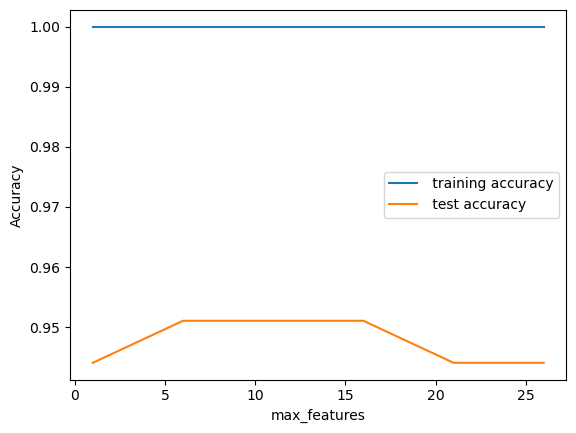

In [41]:
#시각화로 한눈에 파악
plt.plot(max_features_settings, training_accuracy, label =" training accuracy") 
plt.plot(max_features_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("max_features") 
plt.legend()

max_features의 범위를 5부터 20까지로 좁혀서 다시 확인

In [42]:
#k값을 변경하며 각각의 성능을 담을 리스트 생성
training_accuracy = [] 
test_accuracy = [] 

#max_features값은 1부터 30까지 5간격으로
max_features_settings = range(5,20)

#max_features_settings를 for문에 적용하여 max_features에 대입
for max_features in max_features_settings:
    forest = RandomForestClassifier(max_features=max_features, random_state=0)
    forest.fit(X_train, y_train)
    # 리스트에 추가
    training_accuracy.append(forest.score( X_train, y_train)) 
    test_accuracy.append(forest.score( X_test, y_test)) 

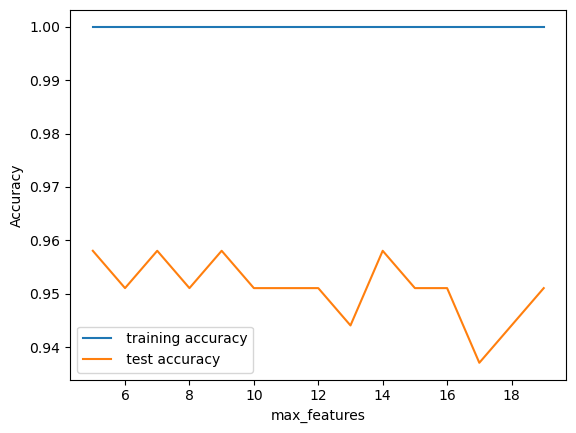

In [50]:
#시각화로 한눈에 파악
plt.plot(max_features_settings, training_accuracy, label =" training accuracy") 
plt.plot(max_features_settings, test_accuracy, label =" test accuracy") 
plt.ylabel("Accuracy") 
plt.xlabel("max_features") 
plt.legend()

In [51]:
max(test_accuracy)

0.958041958041958

max_features값을 조정하며 test 성능이 가장 좋은 지점을 찾아보았지만 디폴트 max_features값을 적용하였을 때와 같은 성능을 보인다. 

https://gils-lab.tistory.com/89 랜덤포레스트 파라미터 조정